


# More Than Just A Packet Of Ramen

CODE 1161 DATA PROJCT:
<img src= "noodles.jpg" style="float: right" width=300 height=150 margin= 20/>

A QUEST TO FIND THE ULTIMATE FLAVOUR AND BRAND.




Orchi | z5359605








In [1023]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns
import squarify

In [1024]:
%matplotlib inline

In [1025]:
plt.rcParams['figure.figsize'] = (20, 10)

In [1026]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

# WINA [World Instant Noodle Association]

Chairman Mr Kiko Ando (President/CEO of Nissin Foods).

<img src= "WINA.jpg" width=350 height=250 style="float: right" margin= 20/>
Their role is to collect and share information related to the noodle industry. Hold conferences/events between manufacturers to discussing food/health/safty and quality issues. Make social contributions through instant noodles. 









In [1027]:
df_demands =pd.read_excel("Ramen_Data.xlsx", sheet_name="Demands for Instant Noodles ")
df_demands.head()

,Countries/Region,2016,2017,2018,2019,2020
0,China,38520.0,38960.0,40250,41450,46350
1,Indonesia,13010.0,12620.0,12540,12520,12640
2,Vietname,4920.0,5060.0,5200,5430,7030
3,India,4270.0,5420.0,6060,6730,6730
4,Japan,5660.0,5660.0,5780,5630,5970


In [1028]:
df_demands.set_index("Countries/Region", inplace=True)

Text(0, 0.5, 'Million Servings')

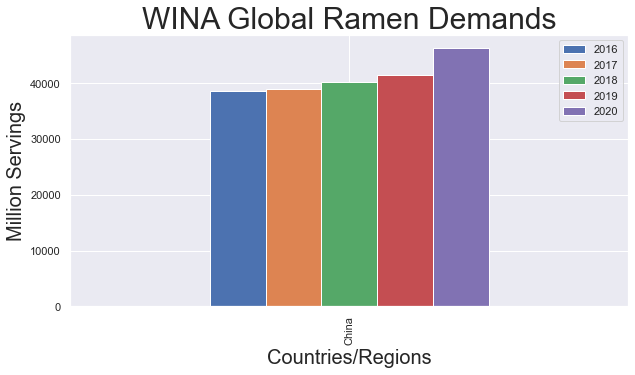

In [1089]:
#china is an outlier
df_demands.head(1).plot.bar(figsize=(10, 5))
plt.title("WINA Global Ramen Demands", fontsize=30)
plt.xlabel("Countries/Regions", fontsize=20)
plt.ylabel("Million Servings",fontsize=20)

In [1030]:
# delete a single row by index value 0
demand_data = df_demands.drop(labels='China', axis=0)
demand_data.head()

,2016,2017,2018,2019,2020
Countries/Region,,,,,
Indonesia,13010.0,12620.0,12540,12520,12640
Vietname,4920.0,5060.0,5200,5430,7030
India,4270.0,5420.0,6060,6730,6730
Japan,5660.0,5660.0,5780,5630,5970
USA,4120.0,4130.0,4520,4630,5050


In [1031]:
plot_d = demand_data.head(10)

In [1032]:
#Bar Graph 
sns.set_theme(style="darkgrid")


In [1107]:
def ramen_demands():
    plot_d.plot.bar(figsize=(15, 7))
    plt.title("WINA Global Ramen Demands", fontsize=30)
    plt.xlabel("Countries/Regions", fontsize=20)
    plt.ylabel("Million Servings",fontsize=20)

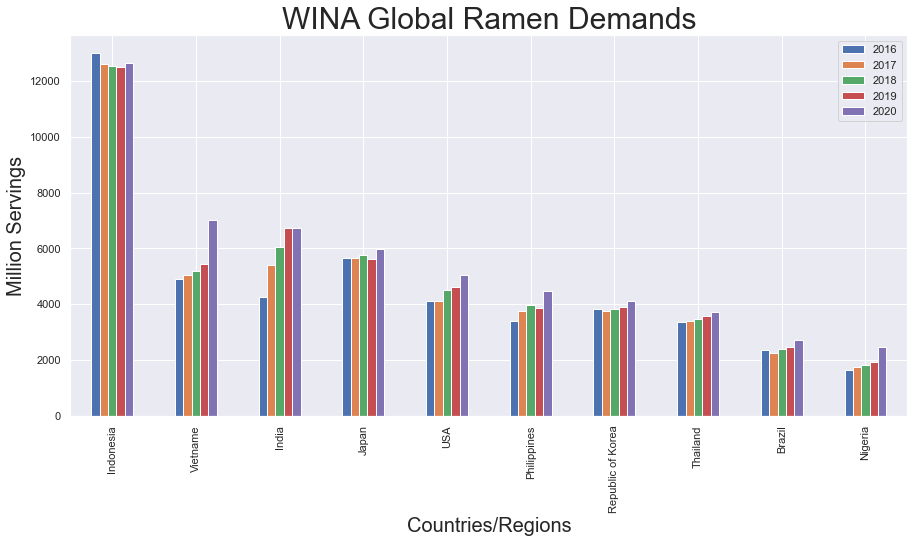

In [1108]:
ramen_demands()

<img src="philippines2018.JPG"/>

# Ramen Ratings

In [1035]:
#importing data
df_rater = pd.read_excel("Ramen_Data.xlsx", sheet_name="The Ramen Rater - Big List Of A")
df_rater.head()





,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN


In [1036]:
def clean_up_stars(x):
    try :
        return float(x)
    except:
        return np.nan 
df_rater["cleanstars"]=df_rater.Stars.apply(clean_up_stars)
df_rater.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,cleanstars
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN,4.00
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN,4.50
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN,4.00
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN,3.25
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN,5.00


In [1037]:
#finding data columns
df_rater.columns



Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten',
       'cleanstars'],
      dtype='object')

In [1038]:
#finding data type
df_rater.dtypes


Review #        int64
Brand          object
Variety        object
Style          object
Country        object
Stars          object
Top Ten        object
cleanstars    float64
dtype: object

In [1039]:
#value count of Brands
df_rater["Brand"].value_counts()

Nissin               399
Nongshim             103
Maruchan              81
Myojo                 72
Mama                  71
                    ... 
President              1
La Moderna             1
Tokachimen Koubou      1
Kimura                 1
Westbrae               1
Name: Brand, Length: 369, dtype: int64

In [1040]:
#value count of Country
df_rater["Country"].value_counts()

Japan            381
United States    340
South Korea      326
Taiwan           229
Thailand         191
China            175
Malaysia         158
Hong Kong        144
Indonesia        141
Singapore        122
Vietnam          108
UK                69
Philippines       47
Canada            41
India             39
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Holland            4
Fiji               4
Sarawak            3
Sweden             3
Finland            3
Dubai              3
Estonia            2
Nigeria            2
Ghana              2
Phlippines         1
Name: Country, dtype: int64

In [1041]:
#value count of packaging style
type_ramen= df_rater["Style"].value_counts()

print(type_ramen)

Pack          1594
Bowl           514
Cup            470
Tray           111
Box              6
Restaurant       1
Can              1
Bar              1
Name: Style, dtype: int64


In [1042]:
df_rater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review #    2700 non-null   int64  
 1   Brand       2700 non-null   object 
 2   Variety     2700 non-null   object 
 3   Style       2698 non-null   object 
 4   Country     2700 non-null   object 
 5   Stars       2700 non-null   object 
 6   Top Ten     41 non-null     object 
 7   cleanstars  2688 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 168.9+ KB


## Word Cloud of Ramen Flavours

In [1043]:
#WordCloud
Text = df_rater['Variety']
Text.head()



0                      Jhen Mian Tang Spicy Hot Noodle
1                          Chicken Shio Wanton Noodles
2    Cup Noodles Chilli Crab Flavour (More Crabtastic)
3    Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...
4                    Neoguri Spicy Seafood Noodle Soup
Name: Variety, dtype: object

In [1044]:
list_of_variety = Text.to_list()



In [1045]:
texts= list_of_variety[0]

texts=" ".join(review for review in list_of_variety)
print ("There are {} words in the combination of all reviewed ramen flavours.".format(len(texts)))

There are 82856 words in the combination of all reviewed ramen flavours.


In [1046]:
sw=set(["Instant","Ramen","Flavored","Cup","Instant Noodle", "Noodle","Noodles","With","Flavour","Flavor","Bowl"])

In [1047]:
def main_word_cloud():

    wordcloud = WordCloud(background_color="white",margin=2, min_font_size=0.5, max_font_size=40, max_words= 82856, min_word_length=0,width=480, height=180, stopwords=sw).generate(texts)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

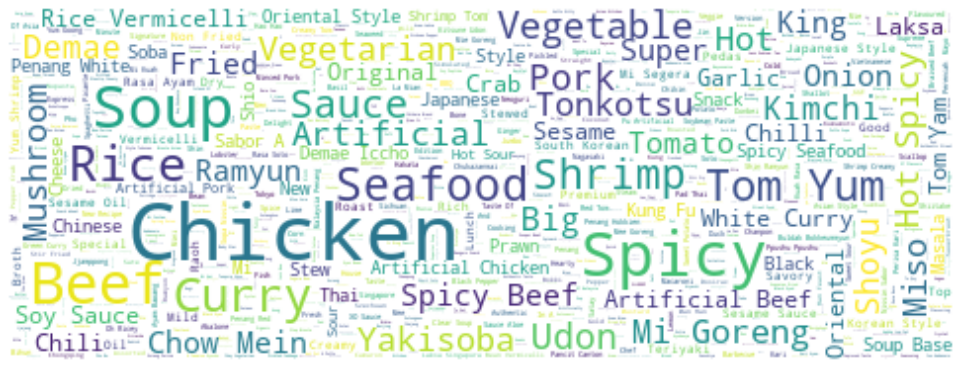

In [1048]:
main_word_cloud()

In [1049]:
bowl_mask = np.array(Image.open("istockphoto-874666510-612x612.jpg"))
bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [1050]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [1051]:
transformed_bowl_mask = np.ndarray((bowl_mask.shape[0], bowl_mask.shape[1]), np.int32)

for i in range (len(bowl_mask)):
    transformed_bowl_mask[i]= list(map(transform_format, bowl_mask[i]))

In [1052]:
transformed_bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [1053]:
def wordcloud_bowl():
    wc = WordCloud(background_color="white", max_words=82856, min_font_size= 1, max_font_size=20, mask=transformed_bowl_mask)

    wc.generate(texts)


    wc.to_file("ramen.jpg")

    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation= "bilinear")
    plt.axis("off")
    plt.show()

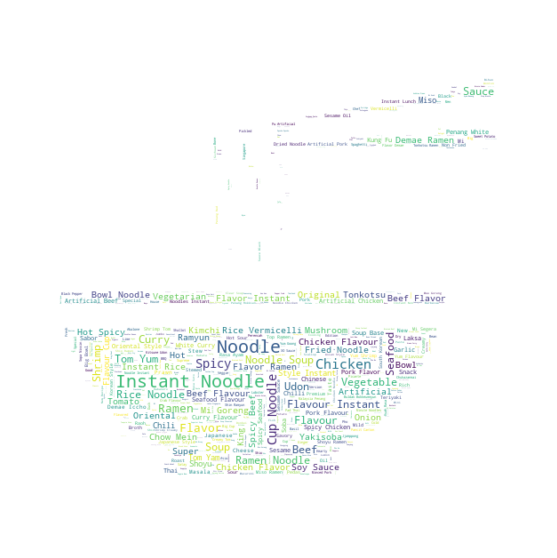

In [1054]:
wordcloud_bowl()

# Value Count of Each Country Lollipop Graph 

In [1055]:
df_copy = df_rater.copy()
df_copy.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,cleanstars
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN,4.00
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN,4.50
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN,4.00
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN,3.25
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN,5.00


In [1056]:
df_copy.dtypes

Review #        int64
Brand          object
Variety        object
Style          object
Country        object
Stars          object
Top Ten        object
cleanstars    float64
dtype: object

In [1057]:
star_country = df_copy.groupby('Country')

In [1058]:
d2 = star_country['Review #'].count().to_frame(name= 'Reviews').reset_index()

In [1059]:
d2

,Country,Reviews
0,Australia,22
1,Bangladesh,7
2,Brazil,5
3,Cambodia,5
4,Canada,41
5,China,175
6,Colombia,6
7,Dubai,3
8,Estonia,2
9,Fiji,4


In [1060]:
# create data
a= d2['Country']
b=d2['Reviews']

In [1061]:
def Most_reviewed_country():
    # stem function
    ax=plt.stem(a, b)
    plt.ylim(0,400)


    plt.xticks(rotation=45, ha='right')
    plt.title("Most Reviewed Country", fontsize=30)
    plt.xlabel("Countries", fontsize=20)
    plt.ylabel("Amount of Reviews", fontsize=20)

    plt.show()
 

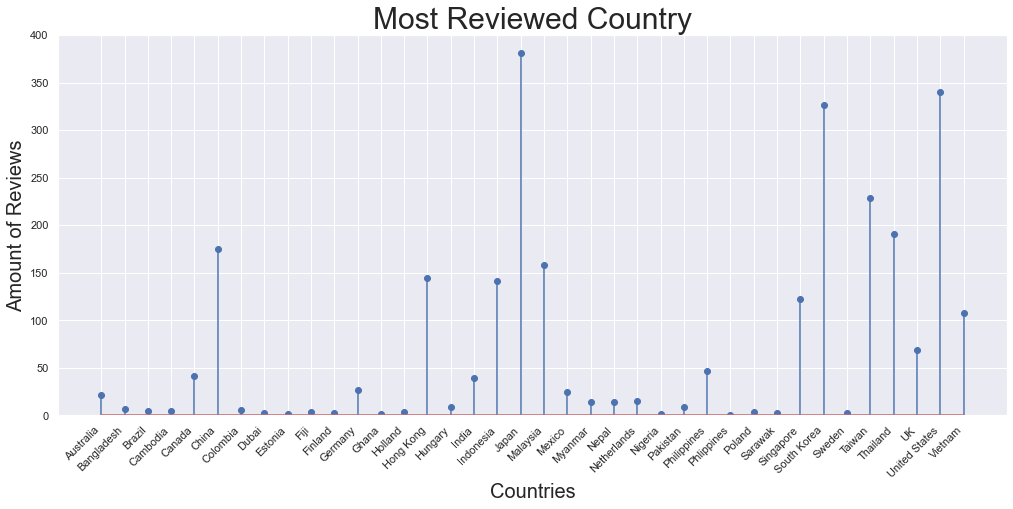

In [1062]:
Most_reviewed_country()

# Bar Graph of Australia, India, UK and Mexico`s Ramen Ratings

In [1063]:
country = df_rater.groupby('Country')
country.nunique()




,Review #,Brand,Variety,Style,Stars,Top Ten,cleanstars
Country,,,,,,,
Australia,22,5,22,2,11,0,11
Bangladesh,7,3,7,1,3,0,3
Brazil,5,1,5,2,4,0,4
Cambodia,5,2,5,1,3,0,3
Canada,41,9,41,3,15,0,15
China,175,34,162,4,21,1,21
Colombia,6,1,6,2,5,0,5
Dubai,3,1,3,1,2,0,2
Estonia,2,1,2,1,2,0,2


# Australia

In [1064]:
def Austrlia_ramen_rating():
    aussie= df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Australia"]
    aussie.cleanstars.sort_values().plot(kind="barh")
    plt.title("Australia`s Ramen Ratings", fontsize=30)
    plt.xlabel("Star Rating", fontsize=15)
    plt.ylabel("Ramen Flavours", fontsize=15)

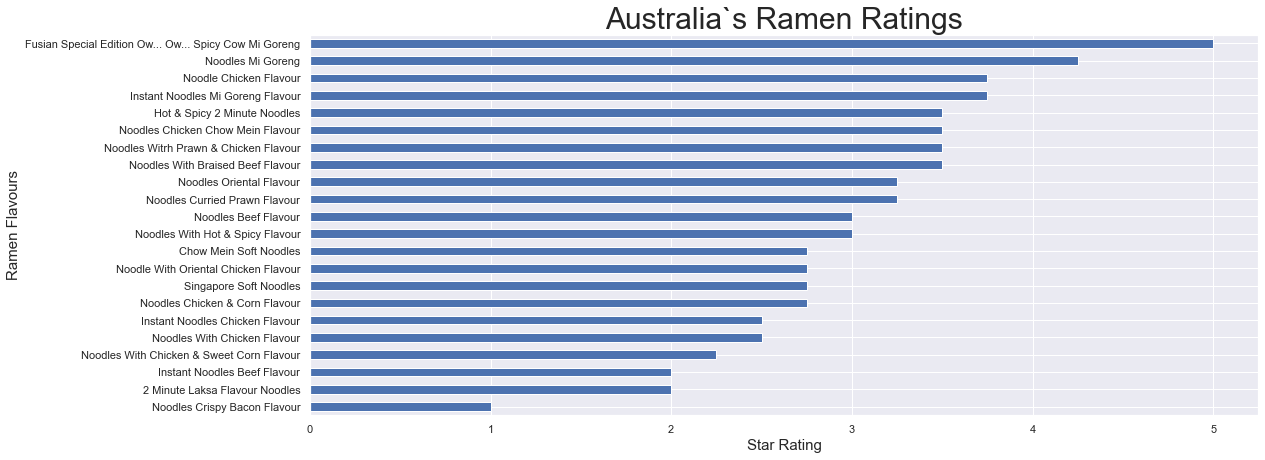

In [1065]:
Austrlia_ramen_rating()

# India

In [1068]:
def India_ramen_rating():
    ind=df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "India"]
    ind[(ind.cleanstars >= 3.5 )].cleanstars.sort_values().plot(kind="barh")
    plt.title("India`s Ramen Ratings", fontsize=30)
    plt.xlabel("Star Rating", fontsize=15)
    plt.ylabel("Ramen Flavours", fontsize=15)
    

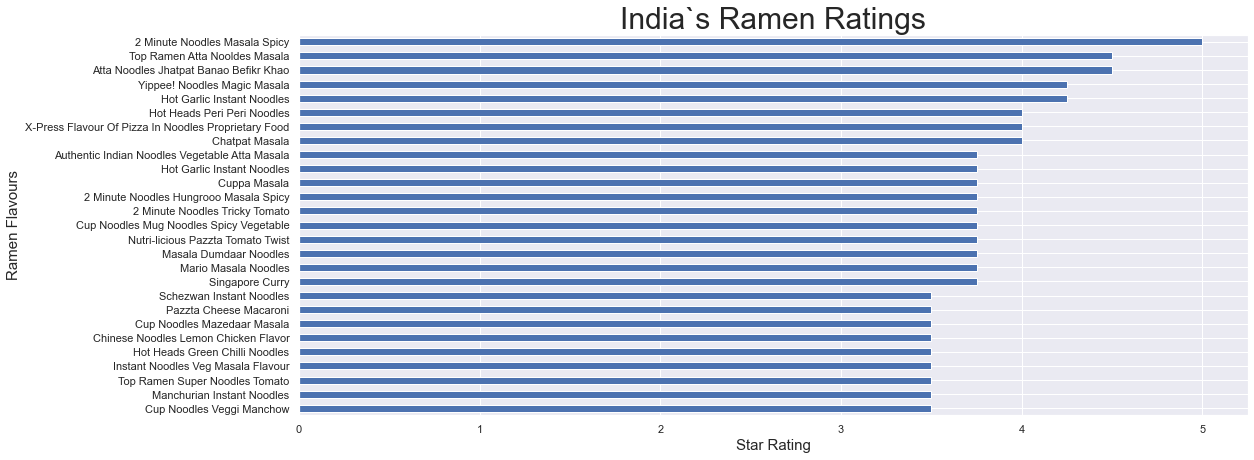

In [1069]:
India_ramen_rating()

# United Kingdom

In [1070]:
def UK_ramen_rating():
    united_k= df_rater.set_index("Variety")[(df_rater.set_index("Variety")["Country"] == "UK")]
    united_k[(united_k.cleanstars >= 3.5 )].cleanstars.sort_values().plot(kind="barh")
    plt.title("UK`s Ramen Ratings", fontsize=30)
    plt.xlabel("Star Rating", fontsize=15)
    plt.ylabel("Ramen Flavours", fontsize=15)

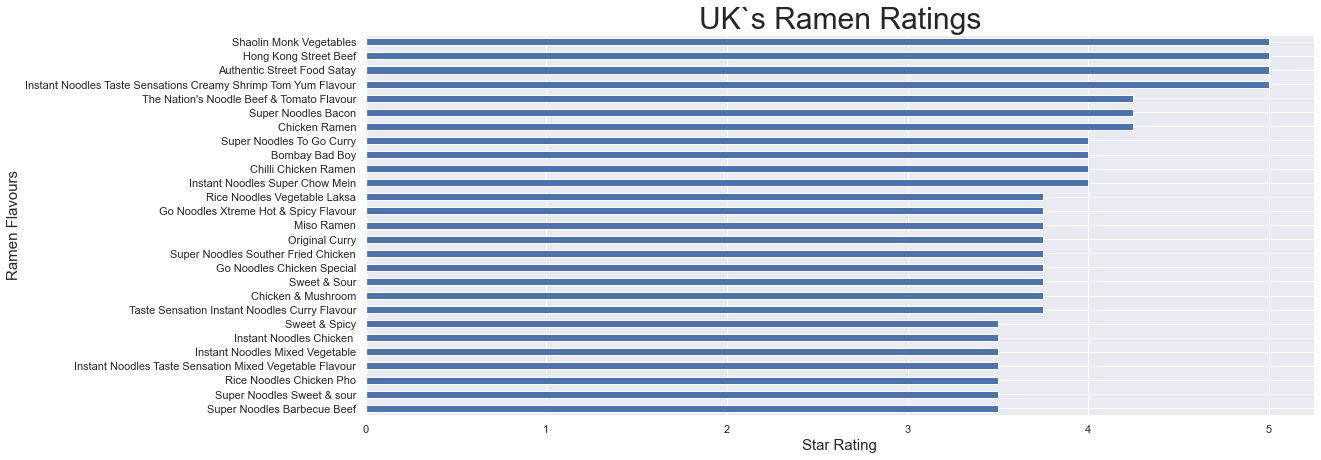

In [1071]:
UK_ramen_rating()

# Mexico

In [1072]:
def Mexico_ramen_ratings():
    mexi=df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Mexico"]
    mexi.cleanstars.sort_values().plot(kind="barh")
    plt.title("Mexico`s Ramen Ratings", fontsize=30)
    plt.xlabel("Star Rating", fontsize=15)
    plt.ylabel("Ramen Flavours", fontsize=15)

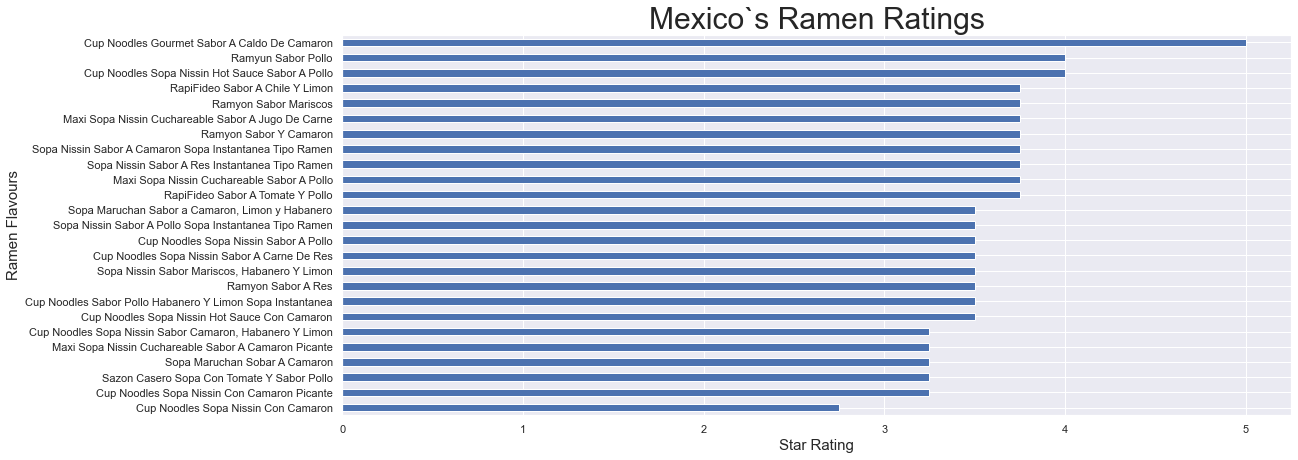

In [1073]:
Mexico_ramen_ratings()

# Top Ten Flavours Word Cloud

In [1074]:
tops = df_rater[[type(x)is str for x in df_rater["Top Ten"]]]
greatest=tops[["#" in x for x in tops["Top Ten"]]]
greatest

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,cleanstars
736,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10,5.00
753,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1,5.00
775,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8,5.00
793,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5,5.00
872,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9,5.00
1011,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5,2016 #7,5.00
1062,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10,5.00
1083,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7,5.00
1115,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4,5.00
1179,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9,5.00


In [1075]:
top = greatest['Variety']
top.head()

736    Instant Noodles Coconut Milk Flavour
753      Singapore Laksa Wholegrain La Mian
775       Juzz's Mee Creamy Chicken Flavour
793      Singapore Curry Wholegrain La Mian
872    Scallion With Sichuan Pepper  Flavor
Name: Variety, dtype: object

In [1076]:
list_top = top.to_list()

In [1077]:
top_ten= list_top[0]

top_ten=" ".join(review for review in list_top)
print ("There are {} words in the combination of all reviewed ramen flavours.".format(len(top_ten)))

There are 1140 words in the combination of all reviewed ramen flavours.


In [1109]:
stopwords_1=set(["Instant","Ramen","Flavored","Cup","Instant Noodle", "Noodle","Noodles","With","Flavour","Flavor","Bowl","Jumbo","Pack","soon","Juzz","Recipe","New","Ripened","Improved","Sauce"])

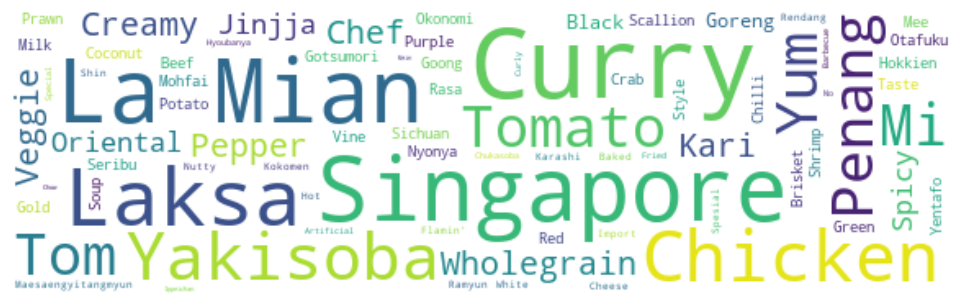

In [1110]:
wordcloud = WordCloud(background_color="white", margin=8, min_font_size=1, max_font_size=60, max_words= 1140, min_word_length=0, stopwords=stopwords_1, width=580, height=180,).generate(top_ten)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tree Map of Brands

In [1080]:
df_rater

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,cleanstars
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN,4.00
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN,4.50
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN,4.00
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN,3.25
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN,5.00
...,...,...,...,...,...,...,...,...
2695,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,3.50
2696,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN,1.00
2697,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN,2.00
2698,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN,2.00


In [1081]:
d3=df_rater['Brand'].value_counts().to_frame(name= 'Reviews').reset_index()

In [1082]:
treemap_d = d3.head(50)

In [1083]:
def most_reviewd_brand():
    plt.figure(figsize=(30,10))

    sizes=treemap_d['Reviews']
    brand=treemap_d['index']

    squarify.plot(sizes, value=brand, color="lightblue")

    plt.title("Most Reviewed Brands", fontsize=30)
    plt.axis('off')
    plt.show()

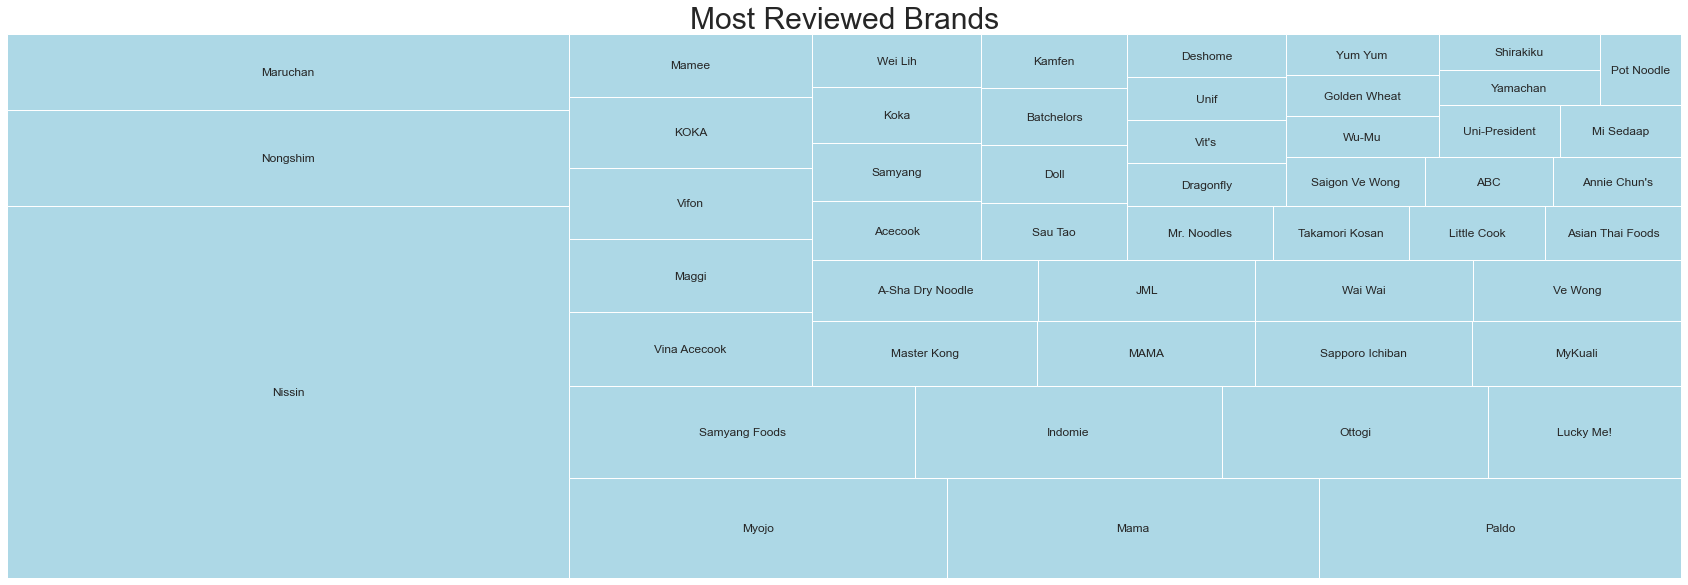

In [1084]:
most_reviewd_brand()

# Top Ten Most Popular Brands

In [1085]:
tops = df_rater[[type(x)is str for x in df_rater["Top Ten"]]]
pop_b=tops[["#" in x for x in tops["Top Ten"]]]
pop_b

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,cleanstars
736,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10,5.00
753,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1,5.00
775,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8,5.00
793,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5,5.00
872,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9,5.00
1011,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5,2016 #7,5.00
1062,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10,5.00
1083,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7,5.00
1115,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4,5.00
1179,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9,5.00


In [1086]:
d4=pop_b['Brand'].value_counts().to_frame(name= 'Reviews').reset_index()
d4


,index,Reviews
0,Prima Taste,5
1,Mama,3
2,MyKuali,3
3,Indomie,3
4,Nongshim,3
5,Myojo,2
6,Paldo,2
7,Mamee,2
8,Sapporo Ichiban,2
9,Samyang Foods,1


In [1087]:
def Top_Ten_Brands():

    plt.figure(figsize=(30,10))
    sizes=d4['Reviews']
    brand=d4['index']

    cmap = matplotlib.cm.Blues
    mini = min(sizes)
    maxi = max(sizes)

    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in sizes]

    squarify.plot(sizes, value=brand, color=colors)

    plt.title("Top Ten Brands", fontsize=30)
    plt.axis('off')
    plt.show()

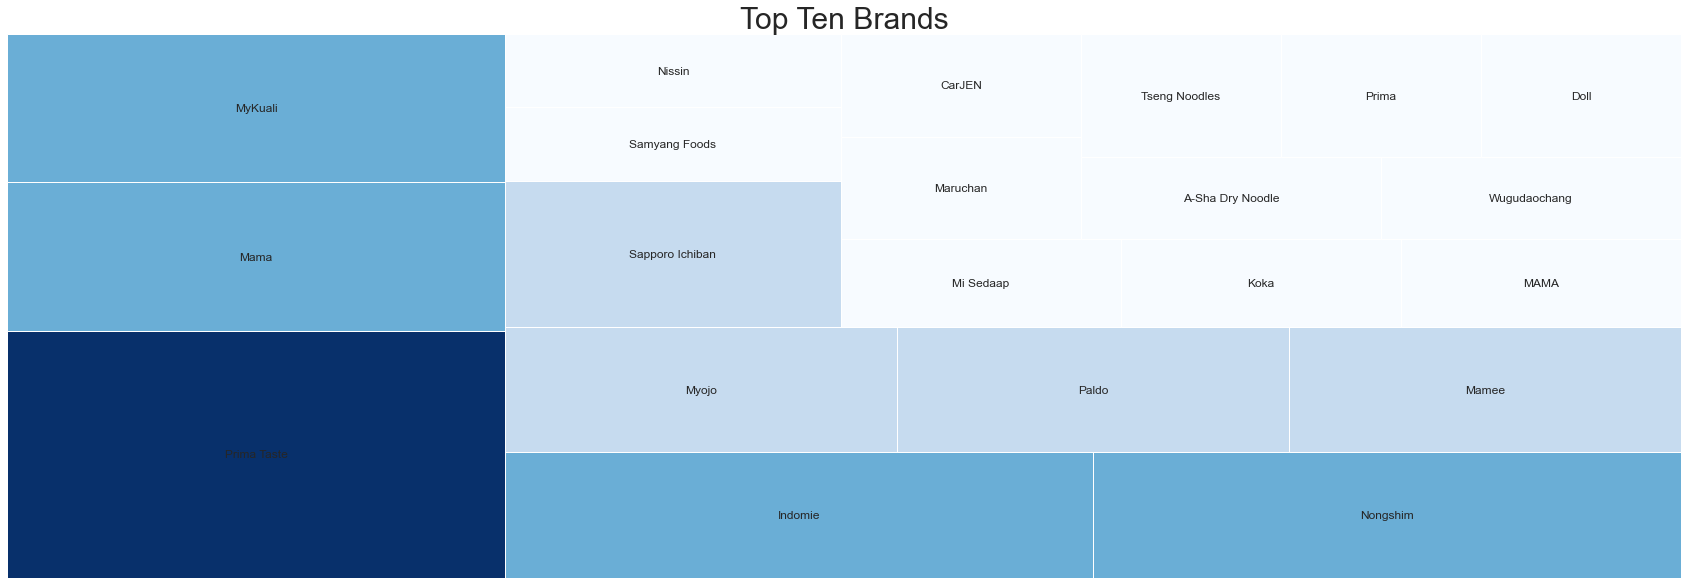

In [1088]:
Top_Ten_Brands()